In [2]:
# -*- coding: utf-8 -*-
"""Untitled6.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1PQzTvS_-ykONVIpJCdY4_M61T3CYWEPT

PART A
"""

import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import t
import pandas as pd
import statsmodels.api as sm
import itertools

# Importing the pandas library
import pandas as pd

# Reading the CSV file 'grocery.txt' with tab delimiter and no header
df = pd.read_csv('grocery.txt', delimiter='\t', header=None)

# Naming the columns as 'Y', 'X1', 'X2', and 'X3'
df.columns = ['Y', 'X1', 'X2', 'X3']

# Printing the DataFrame with column header names
print("DataFrame with Column Header Names:")
print(df.head())

# Importing necessary libraries
from sklearn.linear_model import LinearRegression

# Creating feature variables X and target variable y
X = df.drop('Y', axis=1)  # Features (all columns except 'Y')
y = df['Y']               # Target variable ('Y')

# Creating and fitting a linear regression model
model_linearReg = LinearRegression().fit(X, y)

# Calculating R^2 score
r2_linearReg = model_linearReg.score(X, y)

# Printing R^2 score, coefficients, and intercept
print("R^2 Score:", r2_linearReg)
print("Coefficients (Beta_1, Beta_2, Beta_3):", model_linearReg.coef_)
print("Intercept (Beta_0):", model_linearReg.intercept_)

import numpy as np

# Finding the number of observations (N) and number of predictors (p)
N = len(X)                           # Number of observations
p = len(X.columns) + 1               # Number of predictors + 1 (for intercept)

# Creating a matrix X_with_intercept to include intercept
X_with_intercept = np.empty(shape=(N, p), dtype=float)

# Setting the first column of X_with_intercept to 1 for intercept
X_with_intercept[:, 0] = 1

# Setting the remaining columns of X_with_intercept to X values
X_with_intercept[:, 1:p] = X.values

# Calculating beta_hat using the normal equation method
beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y.values

# Extracting intercept and coefficients from beta_hat
intercept = beta_hat[0]            # Intercept
coefficients = beta_hat[1:]        # Coefficients

# Printing the intercept and coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

from scipy.stats import t

# Calculating residuals
residuals = y.values - X_with_intercept.dot(beta_hat)

# Calculating Residual Sum of Squares (RSS)
RSS = residuals.T.dot(residuals)

# Calculating the number of observations (n) and number of predictors (k)
n, k = X_with_intercept.shape

# Calculating degrees of freedom
degrees_of_freedom = n - k

# Estimating the residual variance (σ^2)
sigma_hat_squared = RSS / degrees_of_freedom
print("Residual Variance (σ^2) estimate:", sigma_hat_squared)

# Calculating the variance of beta_hat
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_hat_squared

# Calculating standard errors of beta_hat
se_beta_hat = np.sqrt(np.diag(var_beta_hat))
print("Standard Errors:", se_beta_hat)

# Calculating z-scores
z_scores = beta_hat / se_beta_hat
print("z-scores:", z_scores)

# Calculating two-sided p-values using the t-distribution
p_values = (1 - t.cdf(np.abs(z_scores), df=degrees_of_freedom)) * 2
print("p-values:", p_values)

import statsmodels.api as sm

# Adding a constant term to the predictor variable matrix
X_constant = sm.add_constant(X)

# Fitting the OLS model
model_OLS = sm.OLS(y, X_constant)
results_OLS = model_OLS.fit()

# Printing the summary table
print(results_OLS.summary())

# Checking if coefficients are the same for all three methods
coefficients_match_all = np.allclose(results_OLS.params[1:], pd.Series(model_linearReg.coef_)) and \
                         np.allclose(results_OLS.params[1:], pd.Series(beta_hat[1:])) and \
                         np.allclose(pd.Series(model_linearReg.coef_), pd.Series(beta_hat[1:]))
print(f"Coefficients match (All three methods): {coefficients_match_all}")

# Validating R^2 values between OLS and Linear Regression
r_squared_match = np.isclose(results_OLS.rsquared, r2_linearReg)
print(f"R^2 values (OLS and SciKit) match: {r_squared_match}")

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Coefficient": results_OLS.params,
    "Standard Error": se_beta_hat,
    "z-score": z_scores,
    "p-value": p_values
}, index=X_constant.columns)

# Print Residual Variance (σ^2) estimate
print("Residual Variance (σ^2) estimate:", sigma_hat_squared)

# Print Fitted Model Results
print("Fitted Model Results:")
print(results_df)

"""PART B"""

import itertools

# Create a dictionary to map column names to their indices
predictor_indices = {column_name: index for index, column_name in enumerate(X.columns)}

# Iterate over different combinations of predictors
for i in range(1, p+1):
    for comb in itertools.combinations(X.columns, i):
        # Get the indices of the predictors in the current combination
        indices = [predictor_indices[column] for column in comb]
        print(indices)

def Cp(model_subset, sigma2, n):
    # Calculate Residual Sum of Squares (RSS)
    RSS = model_subset.ssr

    # Number of predictors
    p = len(model_subset.params)

    # Calculate Cp statistic
    return (1 / n) * (RSS + 2 * p * sigma2)

# Assign values for sigma2, n, and k
sigma2 = sigma_hat_squared
n, k = X.shape

best_models = {}

for i in range(1, p+1):
    best_subset_Cp = float('inf')
    for comb in itertools.combinations(X.columns, i):
        # Get the indices of predictors in the current combination
        indices = [predictor_indices[column] for column in comb]
        predictors = list(indices)

        # Fit the subset model and calculate Cp
        model_subset = sm.OLS(y, X.iloc[:, predictors]).fit()
        current_Cp = Cp(model_subset, sigma2, n)

        # Update best subset if current Cp is smaller
        if current_Cp < best_subset_Cp:
            best_subset_Cp = current_Cp
            best_models[i] = predictors

# Print the best subset predictors for each size k
print("Best Subset Predictors for size k:\n", best_models)

best_subset_AIC = float('inf')
best_subset_k = None

for k, predictors in best_models.items():
    # Fit the subset model and calculate AIC
    model_subset = sm.OLS(y, X.iloc[:, predictors]).fit()
    AIC = model_subset.aic

    # Update best subset AIC and k if current AIC is smaller
    if AIC < best_subset_AIC:
        best_subset_AIC = AIC
        best_subset_k = k

# Print the optimal k selected using AIC
print("Optimal k selected using AIC:", best_subset_k)

# Accessing the optimal features using the selected k
optimal_k = best_models[best_subset_k]
print("Optimal features:", optimal_k)

# Fit the best subset model using the optimal features
best_subset_model = sm.OLS(y, X.iloc[:, optimal_k]).fit()

# Create a DataFrame to store the results of the best subset model
best_subset_results_df = pd.DataFrame({
    "Coefficient": best_subset_model.params,
    "Standard Error": best_subset_model.bse,
    "z-score": best_subset_model.tvalues,
    "p-value": best_subset_model.pvalues
}, index=X.columns)

# Print the results for Best Subset Selection
print("\nBest Subset Selection Results:")
print("Residual Variance (σ^2) estimate:", best_subset_model.mse_resid)
print(best_subset_results_df)

"""FORWARD SELECTION"""

included = []

for i in range(p):
    excluded = [col for col in X.columns if col not in included]
    new_Cp = np.inf
    new_predictor = None

    for col in excluded:
        # Add one predictor at a time and fit the model
        X_subset = X[included + [col]]
        model = sm.OLS(y, X_subset).fit()

        # Calculate Cp for the current model
        current_Cp = Cp(model, sigma2, n)

        # Update Cp and the new predictor if current Cp is smaller
        if current_Cp < new_Cp:
            new_Cp = current_Cp
            new_predictor = col

    # Add the new predictor to the list of included predictors
    if new_predictor is not None:
        included.append(new_predictor)

# Print the predictors selected by forward selection
print("Forward Selection Predictors:", included)

# Convert predictor names to their respective indices
forward_selection_indices = [predictor_indices[predictor] for predictor in included]
print("Forward Selection Predictors (Indices):", forward_selection_indices)

best_FSsubset_AIC = float('inf')
best_FSsubset_k = None
forward_AIC = {}

for i in range(1, len(forward_selection_indices) + 1):
    selected_indices = forward_selection_indices[:i]
    model = sm.OLS(y, X.iloc[:, selected_indices]).fit()

    forward_AIC[i] = model.aic

    if model.aic < best_FSsubset_AIC:
        best_FSsubset_AIC = model.aic
        best_FSsubset_k = i

forward_AIC_series = pd.Series(forward_AIC)

print("Optimal k selected using AIC:", best_FSsubset_k)
optimal_forward_predictors = forward_selection_indices[:best_FSsubset_k]
print("Optimal predictors:", optimal_forward_predictors)

# Fit the model using the optimal predictors selected by forward selection
forward_selection_model = sm.OLS(y, X.iloc[:, optimal_forward_predictors]).fit()

# Create a DataFrame to store the results of the forward selection model
forward_selection_results_df = pd.DataFrame({
    "Coefficient": forward_selection_model.params,
    "Standard Error": forward_selection_model.bse,
    "z-score": forward_selection_model.tvalues,
    "p-value": forward_selection_model.pvalues
}, index=X.columns)

# Print the results for Forward Selection
print("\nForward Selection Results:")
print("Residual Variance (σ^2) estimate:", forward_selection_model.mse_resid)
print(forward_selection_results_df)

"""BACKWARD SELECTION"""

included = list(X.columns)
best_backward_removed = []

for i in range(len(X.columns)):
    worst_z_score = float('inf')
    next_col = None

    for col in included[:]:
        copy = included[:]
        copy.remove(col)

        if not copy:
            print("No more predictors to remove.")
            break

        # Fit the model without the current column
        X_subset = X[copy]
        model_subset = sm.OLS(y, X_subset).fit()

        # Get the absolute value of the last z-score
        last_z_score = abs(model_subset.tvalues.iloc[-1])

        # Update the worst z-score and the next column to remove if the current z-score is worse
        if last_z_score < worst_z_score:
            worst_z_score = last_z_score
            next_col = col

    # Add the next column to remove to the list of removed columns
    if next_col is not None:
        best_backward_removed.append(next_col)
        included.remove(next_col)
    else:
        print("No suitable column found for removal.")
        break

# Print the predictors selected by backward selection
print("Backward Selection Predictors:", best_backward_removed)

# Convert predictor names to their respective indices
backward_selection_indices = [predictor_indices[predictor] for predictor in best_backward_removed]
print("Backward Selection Predictors (Indices):", backward_selection_indices)

included_BS = backward_selection_indices[::-1]

best_BSsubset_AIC = float('inf')
best_BSsubset_k = None
backward_AIC = {}

for i in range(1, len(included_BS) + 1):
    selected_indices = included_BS[:i]
    model = sm.OLS(y, X.iloc[:, selected_indices]).fit()

    backward_AIC[i] = model.aic

    if model.aic < best_BSsubset_AIC:
        best_BSsubset_AIC = model.aic
        best_BSsubset_k = i

backward_AIC_series = pd.Series(backward_AIC)

print("Optimal k selected using AIC:", best_BSsubset_k)
optimal_backward_predictors = included_BS[:best_BSsubset_k]
print("Optimal predictors:", optimal_backward_predictors)

# Fit the model using the optimal predictors selected by backward selection
backward_selection_model = sm.OLS(y, X.iloc[:, optimal_backward_predictors]).fit()

# Create a DataFrame to store the results of the backward selection model
backward_selection_results_df = pd.DataFrame({
    "Coefficient": backward_selection_model.params,
    "Standard Error": backward_selection_model.bse,
    "z-score": backward_selection_model.tvalues,
    "p-value": backward_selection_model.pvalues
}, index=X.columns)

# Print the results for Backward Selection
print("\nBackward Selection Results:")
print("Residual Variance (σ^2) estimate:", backward_selection_model.mse_resid)
print(backward_selection_results_df)

"""PART C"""

from scipy.stats import f

def f_test(RSS_reduced, RSS_full, p_reduced, p_full, n, alpha=0.05):
    # Calculate the F-statistic
    F = ((RSS_reduced - RSS_full) / (p_full - p_reduced)) / (RSS_full / (n - p_full - 1))

    # Degrees of freedom
    df1 = p_full - p_reduced
    df2 = n - p_full - 1

    # Calculate the p-value
    p_value = 1 - f.cdf(F, df1, df2)

    # Make a decision
    if p_value < alpha:
        decision = "Rejected"
    else:
        decision = "Failed to Reject"

    return F, p_value, decision

# Assign necessary variables
sigma2 = results_OLS.mse_resid
p_full = len(coefficients)
n = len(y)

RSS_reduced = best_subset_model.mse_resid
p_reduced = len(optimal_k)

print("Features in the reduced model:", p_reduced)
print("Features in the full model (no intercept):", p_full)
print("Total number of observations:", n)

if p_reduced == p_full:
    print("Warning: The number of predictors in the reduced model is equal to the number of predictors in the full model. Skipping F-test.")
else:
    F, p_value, decision = f_test(RSS_reduced, sigma2, p_reduced, p_full, n)
    print("\nBest Subset Selection - F-statistic:", F)
    print("Best Subset Selection - p-value:", p_value)
    print("Best Subset Selection - Decision:", decision)

"""FORWARD SELECTION"""

RSS_reduced = forward_selection_model.mse_resid
p_reduced = len(optimal_forward_predictors)

print("Features in the reduced model:", p_reduced)
print("Features in the full model (no intercept):", p_full)
print("Total number of observations:", n)

if p_reduced == p_full:
    print("Warning: The number of predictors in the reduced model is equal to the number of predictors in the full model. Skipping F-test.")
else:
    F, p_value, decision = f_test(RSS_reduced, results_OLS.mse_resid, p_reduced, p_full, n)
    print("\nForward Selection - F-statistic:", F)
    print("Forward Selection - p-value:", p_value)
    print("Forward Selection - Decision:", decision)

RSS_reduced = backward_selection_model.mse_resid
p_reduced = len(optimal_backward_predictors)

print("Features in the reduced model:", p_reduced)
print("Features in the full model (no intercept):", p_full)
print("Total number of observations:", n)

# Check if p_reduced is equal to p_full
if p_reduced == p_full:
    print("Warning: The number of predictors in the reduced model is equal to the number of predictors in the full model. Skipping F-test.")
else:
    # If p_reduced is not equal to p_full, perform the F-test
    F, p_value, decision = f_test(RSS_reduced, results_OLS.mse_resid, p_reduced, p_full, n)
    print("\nBackward Selection - F-statistic:", F)
    print("Backward Selection - p-value:", p_value)
    print("Backward Selection - Decision:", decision)

DataFrame with Column Header Names:
      Y      X1    X2  X3
0  4264  305657  7.17   0
1  4496  328476  6.20   0
2  4317  317164  4.61   0
3  4292  366745  7.02   0
4  4945  265518  8.61   1
R^2 Score: 0.6883341607166356
Coefficients (Beta_1, Beta_2, Beta_3): [ 7.87080382e-04 -1.31660192e+01  6.23554481e+02]
Intercept (Beta_0): 4149.887211954382
Intercept: 4149.887211957204
Coefficients: [ 7.87080382e-04 -1.31660192e+01  6.23554481e+02]
Residual Variance (σ^2) estimate: 20531.869716538447
Standard Errors: [1.95565405e+02 3.64553999e-04 2.30917315e+01 6.26409466e+01]
z-scores: [21.21994533  2.15902276 -0.57016163  9.95442303]
p-values: [0.00000000e+00 3.58765037e-02 5.71227381e-01 2.94209102e-13]
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:     

In [17]:
A = pd.DataFrame([[ 1,2,3],[4,5,6],[7,8,9]])

In [18]:
A.columns = ['name','population','area']

In [26]:
A

,name,population,area
0,1,2,3
1,4,5,6
2,7,8,9


In [27]:
a1 = A['name']>2

In [28]:
a2 = A['population']>2

In [29]:
a1

0    False
1     True
2     True
Name: name, dtype: bool

In [30]:
a2

0    False
1     True
2     True
Name: population, dtype: bool

In [31]:
a1 & a2

0    False
1     True
2     True
dtype: bool

In [15]:
a=(A['population']>2)[A['population']>2]

In [32]:
A.loc[a1 & a2]

,name,population,area
1,4,5,6
2,7,8,9


IIT Math Stats HW 5 Extra 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.exponential(size=10)
y = np.random.binomial(1, 0.5, 10)
doubleExponentialSample = (y*2-1)*x

In [3]:
theta = np.linspace(-1,1,20)

In [4]:
l = [np.log(2)-sum(abs(doubleExponentialSample-i)) for i in theta]

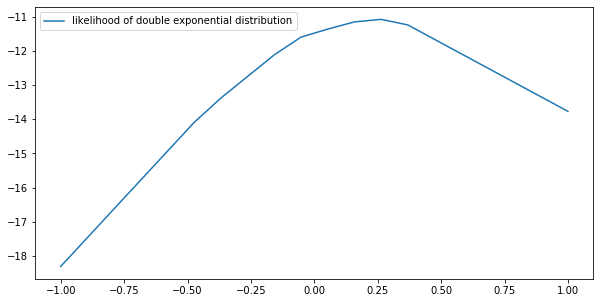

In [5]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_subplot(111)
A = ax.plot(theta,l,label='likelihood of double exponential distribution')
ax.legend()

EM Algorithm 6.6.4

In [6]:
x = [125,18,20,34]
n=4
theta = 1/n*(x[0]-x[1]-x[2]+x[3])
theta0 = 0

In [7]:
diff = abs(theta-theta0)
max_iter = 100
cvg_diff = 1e-5
k=0
theta_list=[]

while diff>cvg_diff and k<max_iter:
    theta0=theta
    theta = (x[0]*theta0+2*x[3]+x[3]*theta0)/(n*theta0+2*(x[1]+x[2]+x[3]))
    diff = abs(theta-theta0)
    theta_list.append(theta)

In [8]:
len(theta_list)

51

In [9]:
theta_list

[18.406603773584905,
 13.760507880910684,
 11.333891318311,
 9.877112717373448,
 8.928531161911485,
 8.277793733022602,
 7.815256175006035,
 7.478135735365121,
 7.22790639859813,
 7.0396487985859135,
 6.896572068532827,
 6.786993125209353,
 6.702573744498635,
 6.637241774691265,
 6.586503930718002,
 6.546992720971632,
 6.516158791217409,
 6.492056662651968,
 6.473192260947366,
 6.458412418999544,
 6.446823563585368,
 6.437731111803287,
 6.4305938264046,
 6.4249891414419364,
 6.420586637374892,
 6.417127635755336,
 6.414409430494423,
 6.412273058000301,
 6.410593784579657,
 6.409273690383333,
 6.408235877295004,
 6.407419938634063,
 6.406778411746387,
 6.406273997735897,
 6.405877380891928,
 6.405565517501877,
 6.405320292417619,
 6.405127463974526,
 6.404975835144693,
 6.4048566022741324,
 6.4047628432690304,
 6.404689115318416,
 6.4046311386774954,
 6.404585548079845,
 6.404549697302055,
 6.404521505508068,
 6.404499336436782,
 6.4044819034097955,
 6.404468194639149,
 6.40445741449575

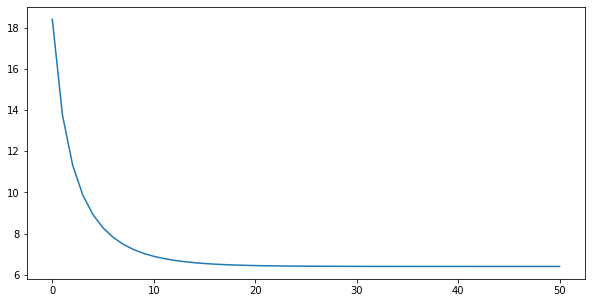

In [10]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_subplot(111)
A = ax.plot(theta_list)

Math Stats HW9 9.26

In [11]:
from scipy.stats import poisson

In [139]:
lambda_list=np.linspace(0.01,62,6200)

In [140]:
c_list=np.log(poisson.ppf(0.9,lambda_list))*np.log(lambda_list/62)-9*(lambda_list-62)

E:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [141]:
ans=np.exp(558-9*lambda_list)*(9*lambda_list/558)**558<c_list

In [144]:
k=0
for i in ans:
    if not i:
        print(lambda_list[k])
        break
    k=k+1

61.89


In [145]:
lambda_list=np.linspace(62.01,100,3800)

In [155]:
c_list=np.log(poisson.ppf(0.9,lambda_list))*np.log(lambda_list/62)-9*(lambda_list-62)

In [156]:
ans=np.exp(558-9*lambda_list)*(9*lambda_list/558)**558<c_list

In [157]:
k=0
for i in ans:
    k=k+1
    if not i:
        print(lambda_list[k])
        break

62.019999999999996


In [159]:
from scipy.stats import chi2

In [165]:
chi2.ppf(0.95,1116)/18

66.37943613057222

In [166]:
chi2.ppf(0.05,1118)/18

57.85413174301712

In [3]:
def prod(*numbers):
    if not numbers:
        raise TypeError
    number=1
    for i in numbers:
        number = number * i
    return number

prod(1,1,1,2,3)

6

In [4]:
prod(6,6,6)

216

20200601 Edith learning Python

In [1]:
import re
from datetime import datetime, timezone, timedelta

In [64]:
dt_str='2015-6-1 08:10:30'
tz_str='UTC+7:00'

In [46]:
exec('tz_utc = timezone(timedelta(hours='+tz+'))')

In [48]:
dt = datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S').replace(tzinfo=tz_utc)

In [49]:
dt

datetime.datetime(2015, 6, 1, 8, 10, 30, tzinfo=datetime.timezone(datetime.timedelta(seconds=25200)))

In [50]:
dt.timestamp() #1433121030

1433121030.0